# Load the LGMR data

In [1]:
import xarray as xr
# open the 'LGMR_GMST_ens.nc' file
ds_sat = xr.open_dataset('data/LGMR_SAT_climo.nc')
ds_sat

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, age: 120)
Coordinates:
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age      (age) float32 100.0 300.0 500.0 ... 2.35e+04 2.37e+04 2.39e+04
Data variables:
    sat      (age, lat, lon) float32 ...
    sat_std  (age, lat, lon) float32 ...

# Crop the data 

In [2]:
# remove the data with age<11
ds_sat = ds_sat.where(ds_sat.age>=11000, drop=True)

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


# Create the centered data

In [3]:
import numpy as np
import xarray as xr

# Assuming your dataset is named 'data'
# Calculate the mean along the 'age' axis
mean_data = ds_sat['sat'].mean(dim='age')

# Subtract the mean from the data
centered_data = ds_sat['sat'] - mean_data

ds_sat['sat_centered'] = centered_data

sat_centered = ds_sat['sat_centered'].values.reshape(len(ds_sat['age']), 96*144)

# Normalize the data to zero mean and unit SD

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

sat = ds_sat['sat'].values
sat = sat.reshape(len(ds_sat['age']), 96*144)
print('shape of sat:', sat.shape)
sat_scaled = scaler.fit_transform(sat)

shape of sat: (65, 13824)


In [41]:
# import zscore
from scipy.stats import zscore

sat = ds_sat['sat'].values
sat = sat.reshape(len(ds_sat['age']), 96*144)

# perform zscore for each column
sat_scaled= zscore(sat, axis=0)


Text(0, 0.5, 'sat')

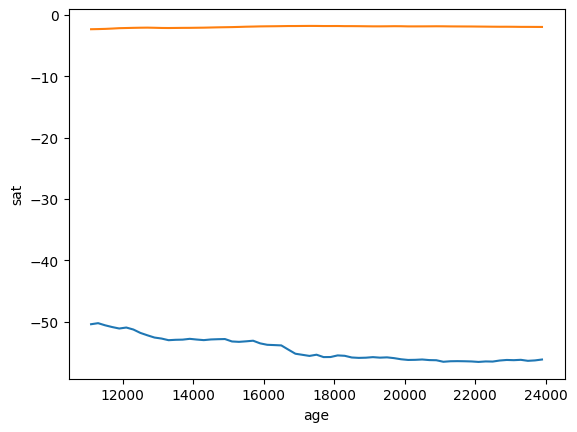

In [38]:
# plot a random column of the data
import matplotlib.pyplot as plt

plt.plot(ds_sat['age'], sat[:, 1])
plt.plot(ds_sat['age'], sat_scaled[:, 1])
plt.xlabel('age')
plt.ylabel('sat')

# Do k-means for the sat data

In [19]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=5, n_init="auto").fit(sat.T)
class_labels=kmeans.labels_
print('labels: ',class_labels)

sat_shape=ds_sat['sat'].shape
ds_sat['class_label'] = (('lat', 'lon'), class_labels.reshape(sat_shape[1], sat_shape[2]))

labels:  [0 0 0 ... 3 3 3]


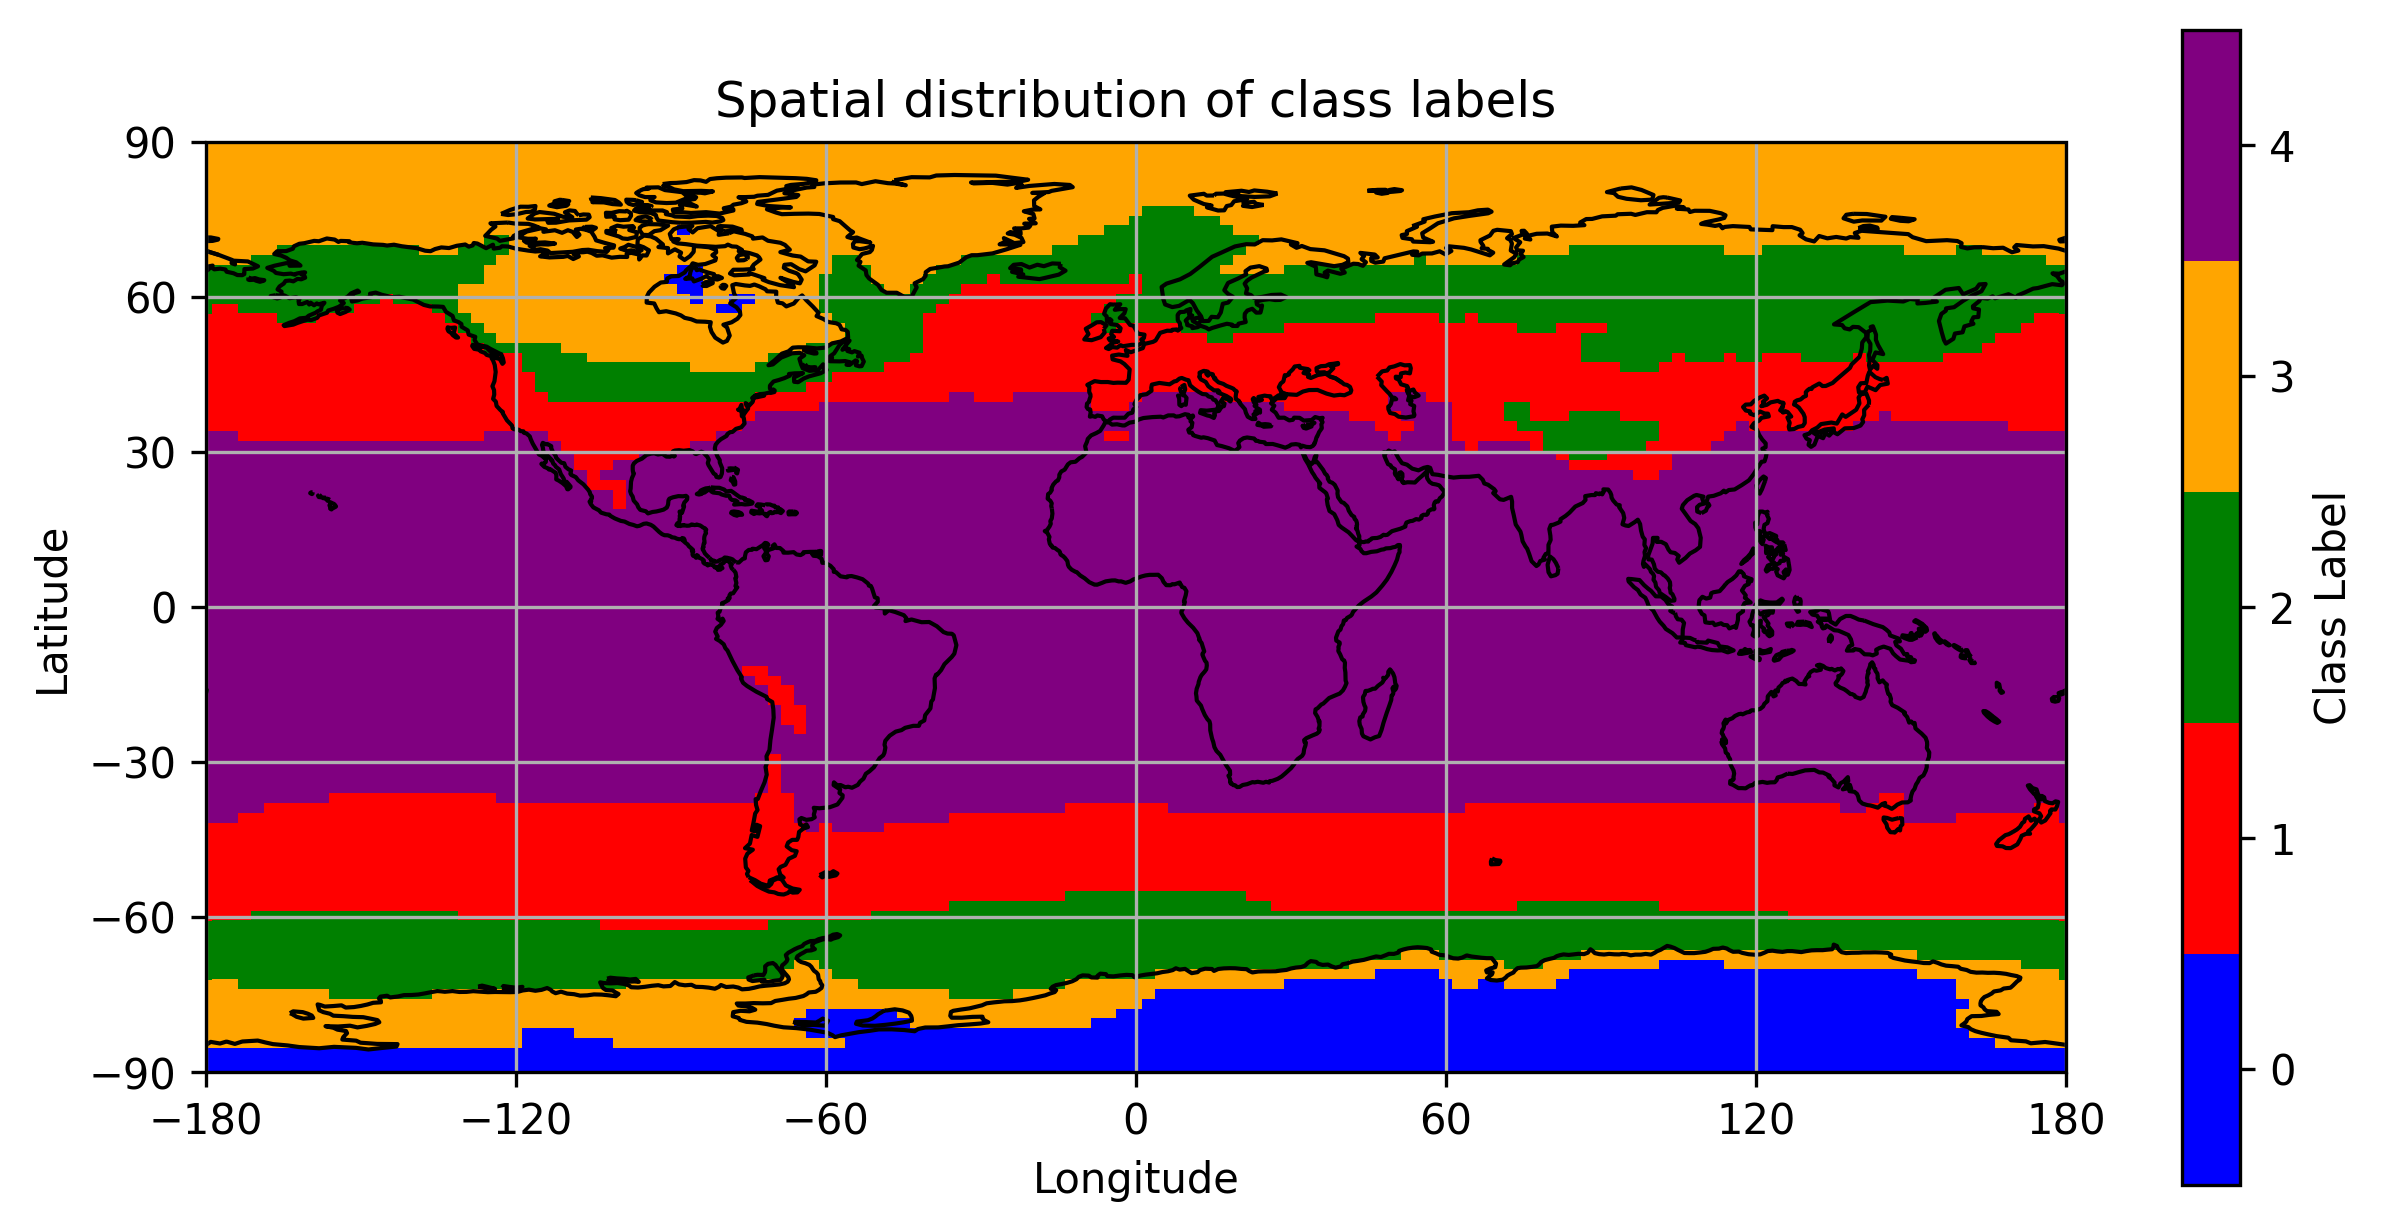

In [20]:
from toolbox import GMM_functions as gf
gf.plot_labels(ds_sat)
# gf.plot_all_label_at_sequence(ds_sat)

# Do k-means for the sat_centered data

In [44]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(sat_centered.T)
class_labels=kmeans.labels_
print('labels: ',class_labels)

sat_shape=ds_sat['sat'].shape
ds_sat['class_label'] = (('lat', 'lon'), class_labels.reshape(sat_shape[1], sat_shape[2]))

labels:  [0 0 0 ... 1 1 1]


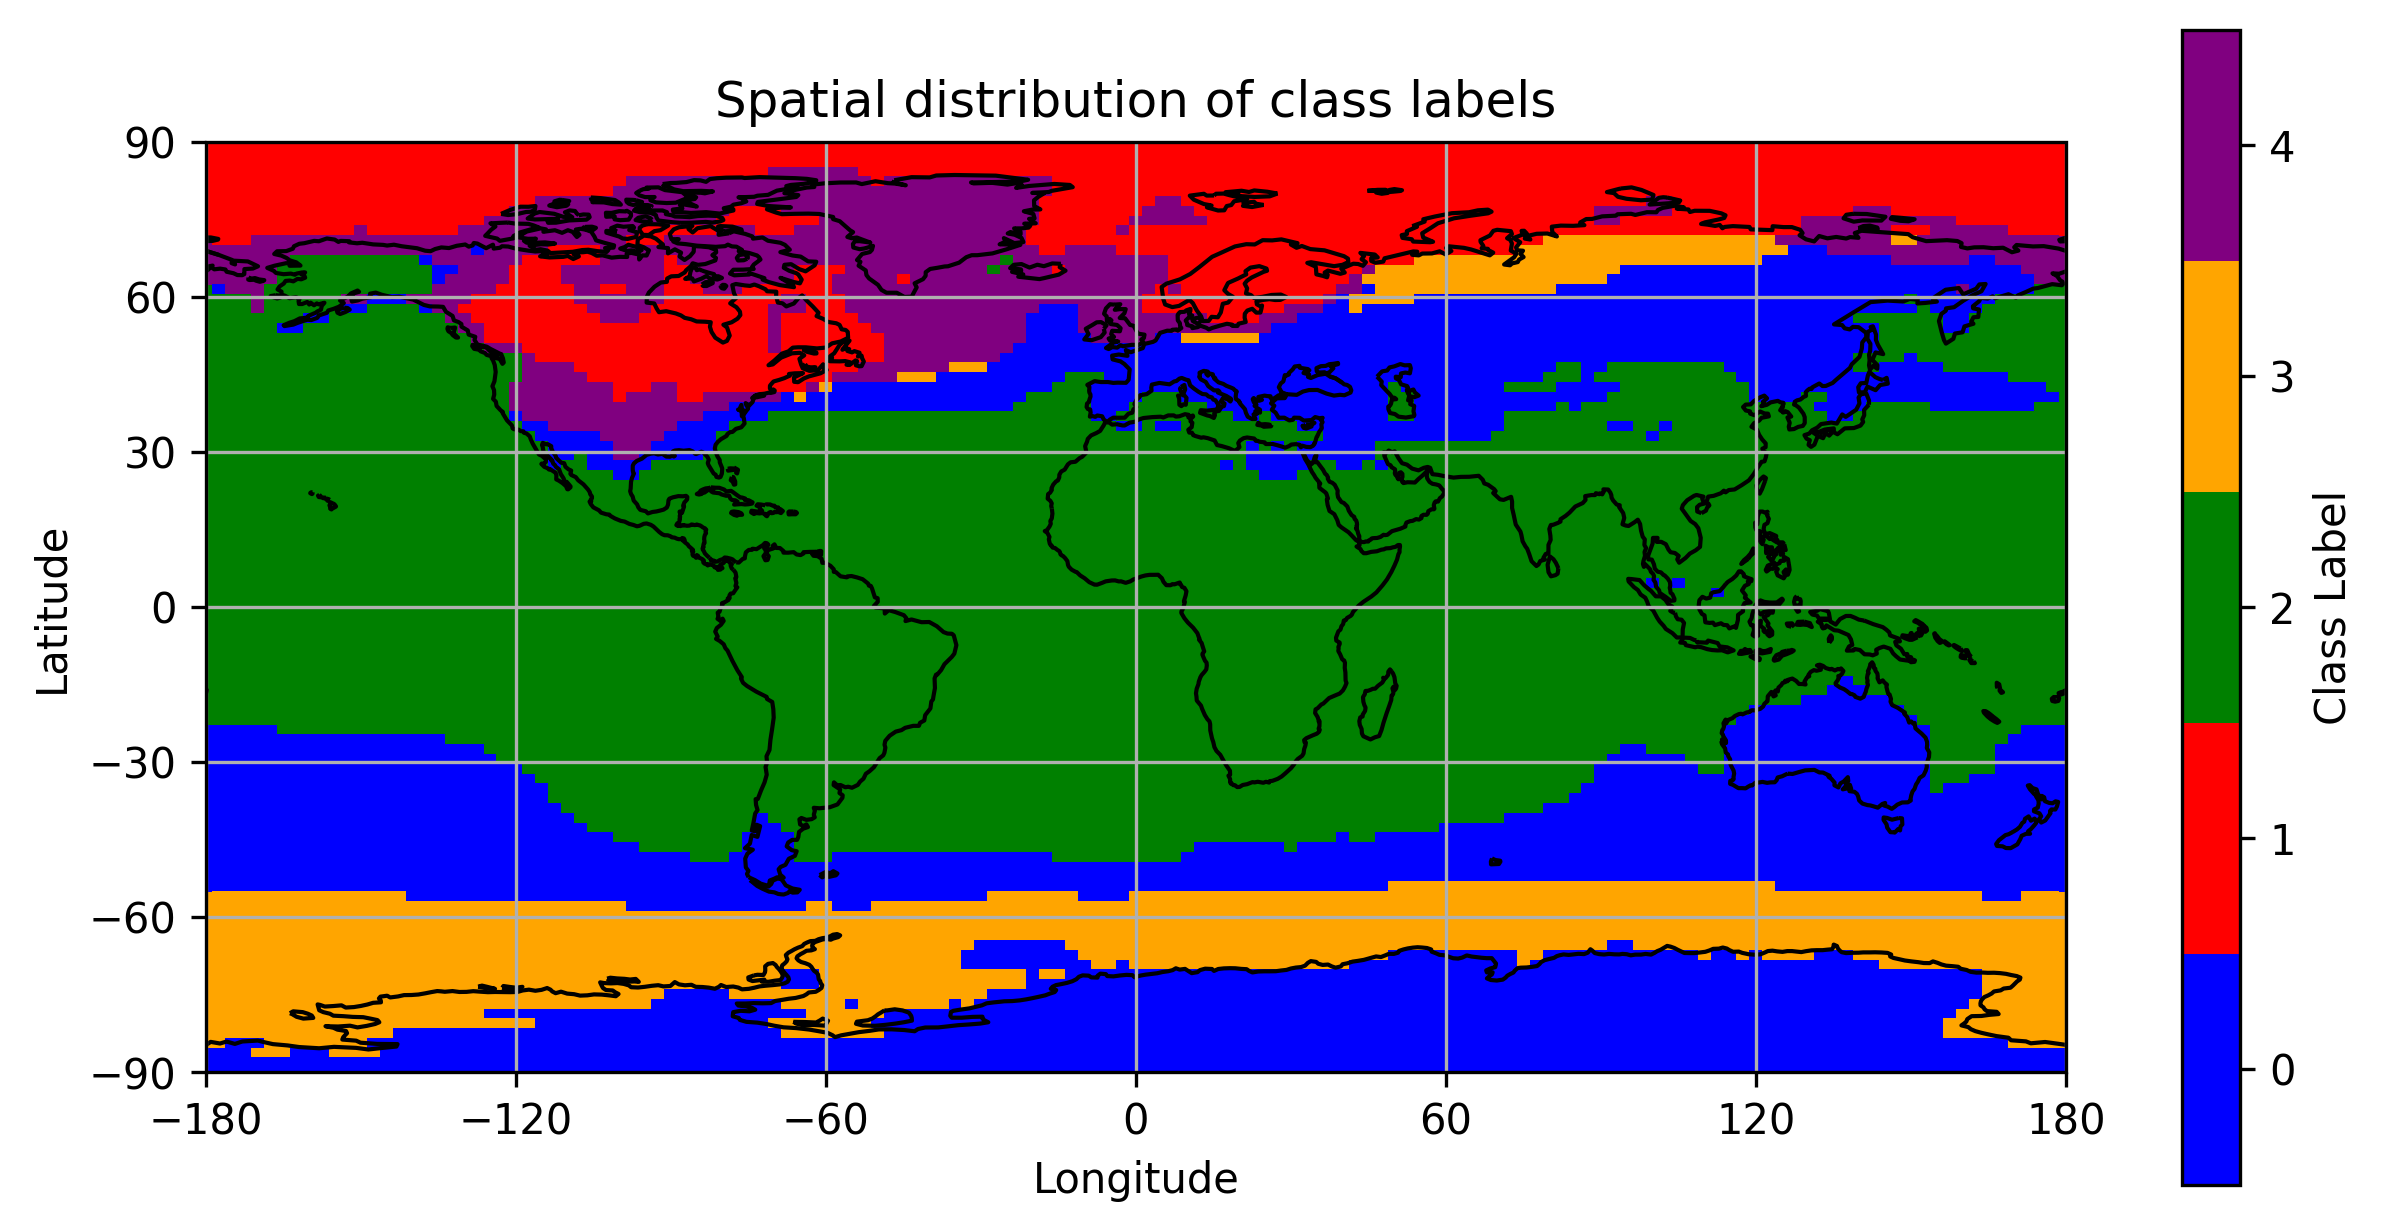

In [45]:
from toolbox import GMM_functions as gf
gf.plot_labels(ds_sat)

# Do k-means for the normalized sat data

In [46]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(sat_scaled.T)
class_labels=kmeans.labels_
print('labels: ',class_labels)

sat_shape=ds_sat['sat'].shape
ds_sat['class_label'] = (('lat', 'lon'), class_labels.reshape(sat_shape[1], sat_shape[2]))

labels:  [0 0 0 ... 4 4 4]


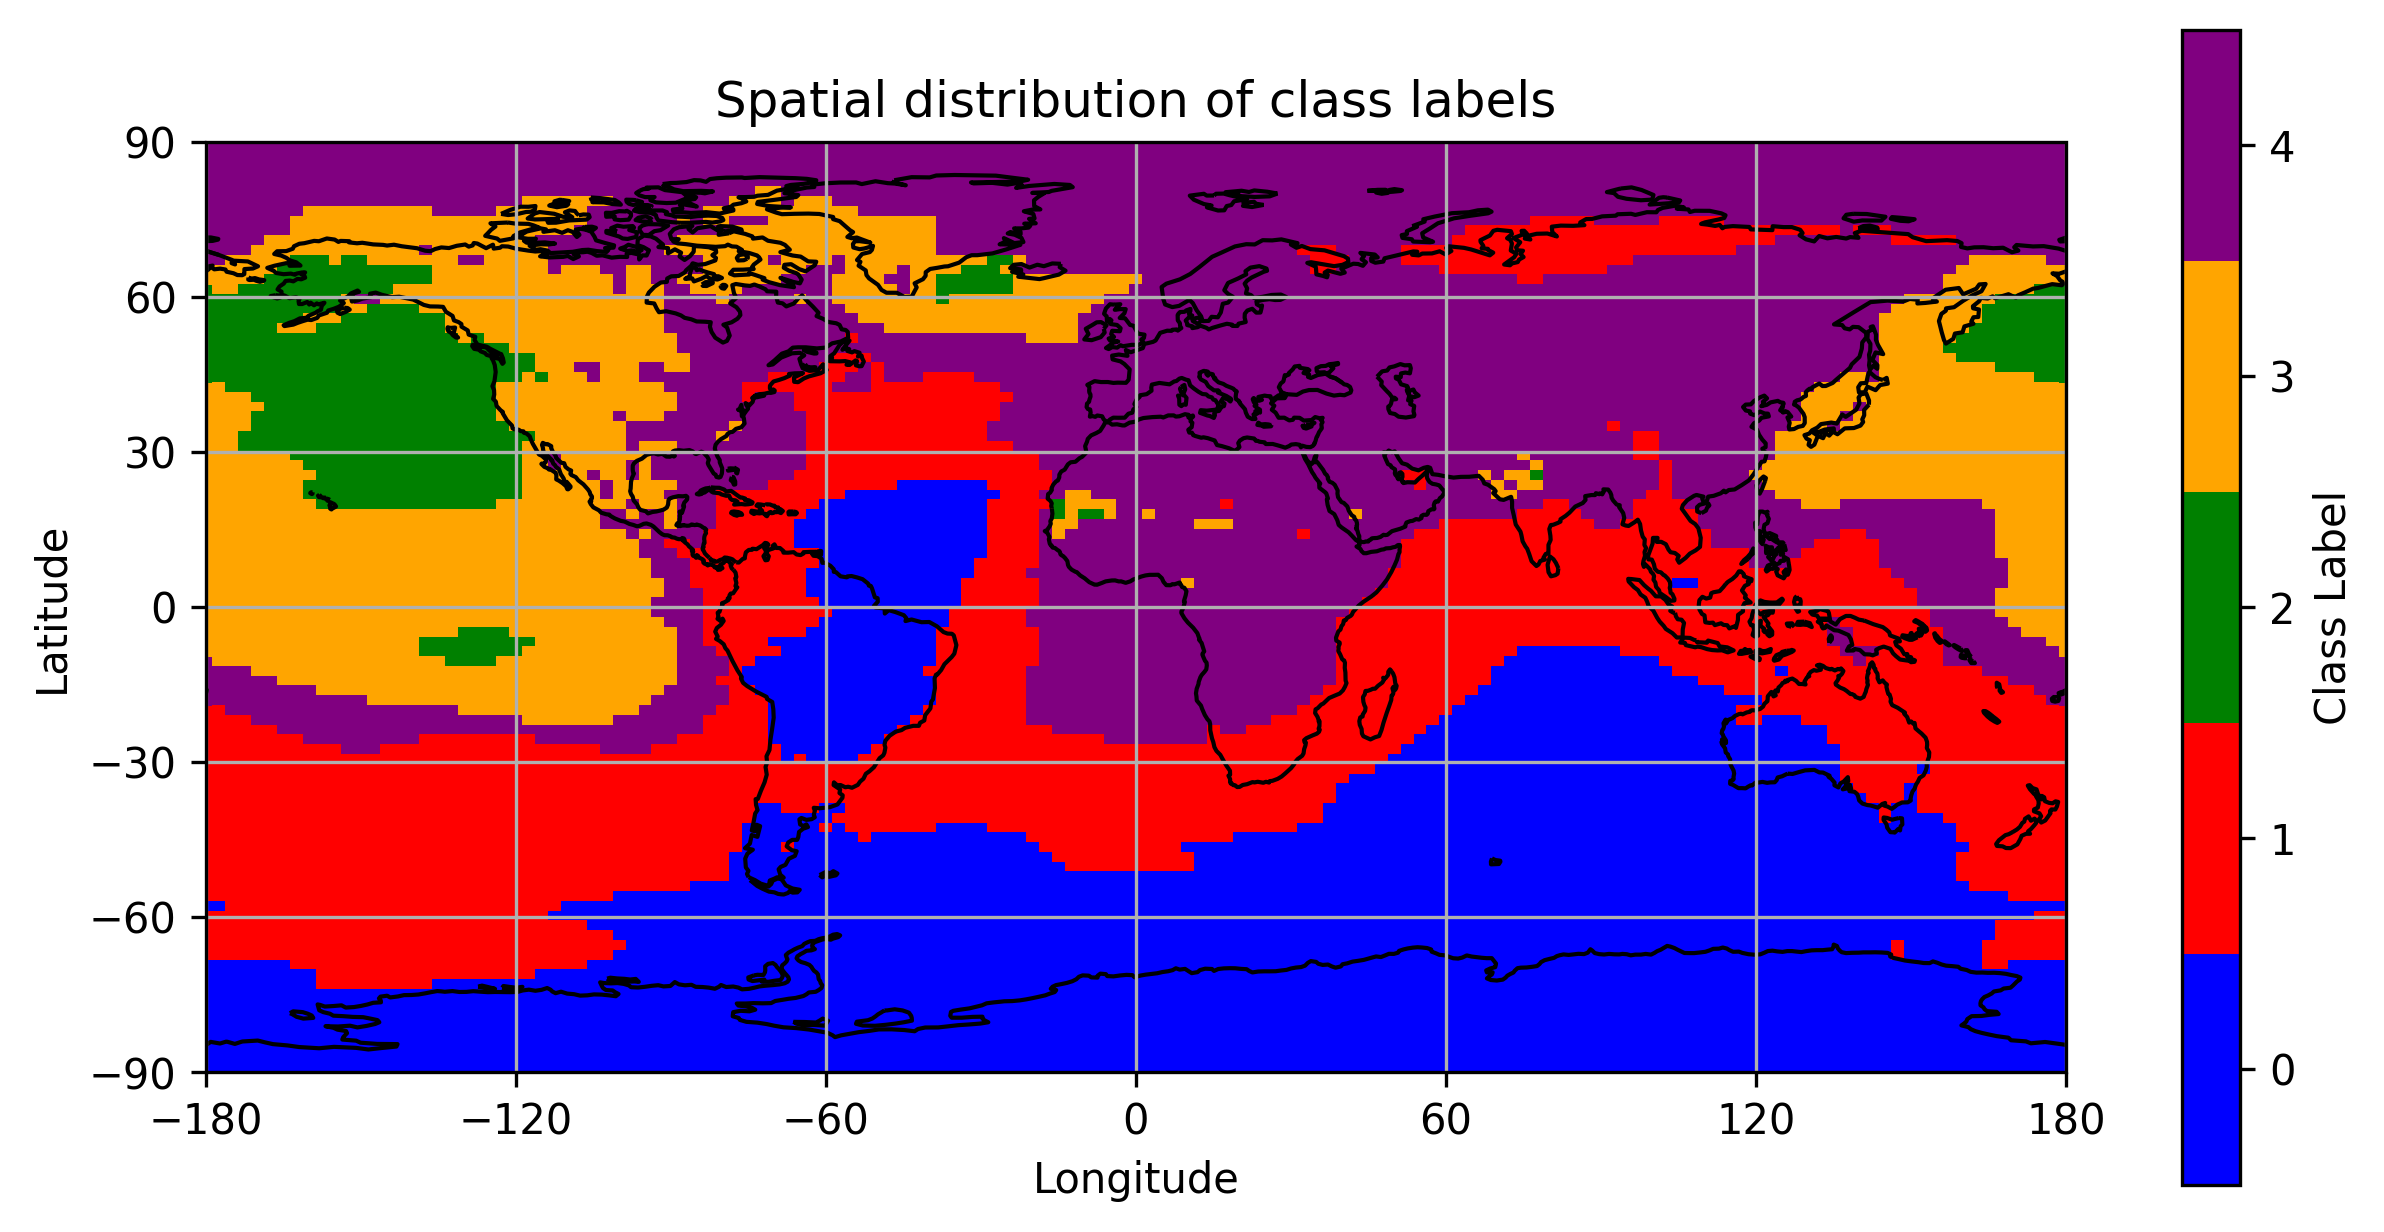

In [47]:
from toolbox import GMM_functions as gf
gf.plot_labels(ds_sat)

# Calculate changes in Si for sat 

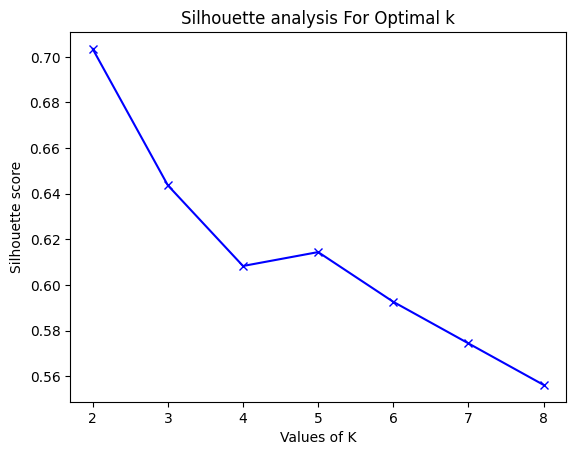

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init="auto").fit(sat.T)
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(sat.T, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# Calculate changes in Si for normalized sat

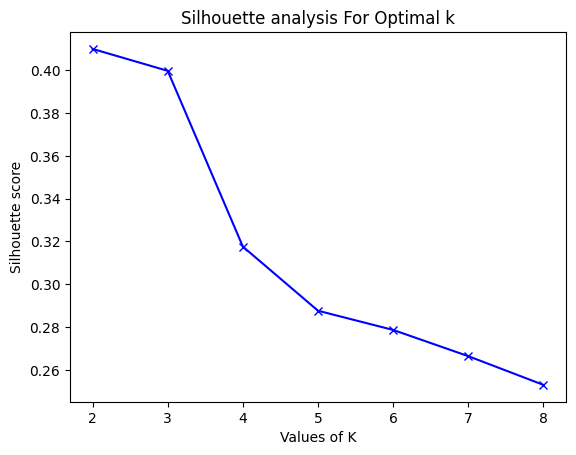

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init="auto").fit(sat_scaled.T)
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(sat_scaled.T, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()